In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = './write/paga.h5ad'
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.0.1
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.3
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2.30.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.2
h5py                2.10.0
igraph              0.9.4
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi   

In [4]:
data_dir = "/data/mohyelim7/scRNAseq/"
ad = sc.read_text(data_dir+"exprMatrix.tsv.gz")
meta = pd.read_csv(data_dir+"meta.tsv", sep="\t")
ad.var = meta

genes = pd.read_csv(data_dir+"rawMatrix/genes.tsv", sep="\t", names=["gene_ids", "gene_names"])

In [5]:
adata = ad.transpose()

/home/mohyelim7/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
def tsvToDic(dir_path):
    dic = {}
    with open(dir_path+"/genes.tsv") as f:
        for line in f:
            key, value = line.split("\t")
            dic[key]=value.strip()
    return dic

In [7]:
genes_dic = tsvToDic("/data/mohyelim7/scRNAseq/rawMatrix")

In [8]:
df_id = pd.DataFrame({'gene_id' : list(adata.var_names)})
df_id.replace(to_replace=genes_dic, inplace=True)

In [9]:
adata.var.index = df_id['gene_id']

In [10]:
adata.X = adata.X.astype('float64')

# Preprocessing and Visualization

Individual expression matrices containing numbers of Unique molecular identifiers (UMIs) per
nucleus per gene were filtered to retain nuclei with at least 500 genes expressed and less than 5%
of total UMIs originating from mitochondrial and ribosomal RNAs. Mitochondrial RNA genes
were filtered out as well to exclude transcripts coming from outside the nucleus to avoid biases 
introduced by nuclear isolation and ultracentrifugation. Individual matrices were combined, UMIs
were normalized to the total UMIs per nucleus and log transformed

In [ ]:
# sc.pp.recipe_zheng17(adata)

In [11]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:07:29)


In [12]:
!pip install fa2

In [13]:
sc.settings.njobs = 50

In [14]:
sc.pp.neighbors(adata, n_neighbors=323, n_pcs=15)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:01)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:18:30)


... storing 'cluster' as categorical
... storing 'sample' as categorical
... storing 'region' as categorical
... storing 'sex' as categorical
... storing 'diagnosis' as categorical
... storing 'Capbatch' as categorical
... storing 'Seqbatch' as categorical


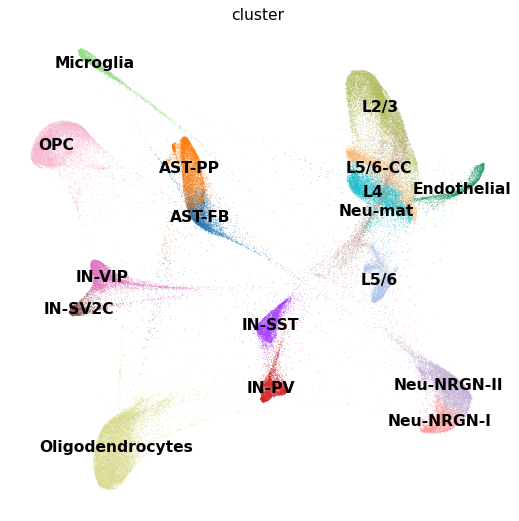

In [15]:
plot = sc.pl.draw_graph(adata, color='cluster', legend_loc='on data', return_fig=True)
plot.set_size_inches(8, 8)

--> added 'pos', the PAGA positions (adata.uns['paga'])


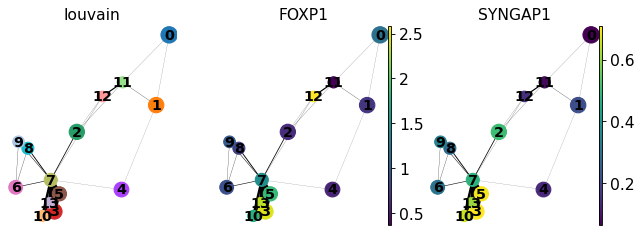

In [19]:
sc.pl.paga(adata, color=['louvain', 'FOXP1', 'SYNGAP1'])

# Clustering and PAGA

In [17]:
sc.tl.louvain(adata, resolution=1.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:04:11)


In [18]:
sc.tl.paga(adata, groups='louvain')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:23)


--> added 'pos', the PAGA positions (adata.uns['paga'])


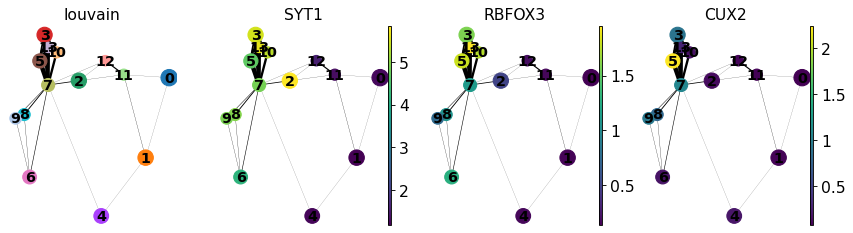

In [20]:
sc.pl.paga(adata, color=['louvain', 'SYT1', 'RBFOX3', 'CUX2']) # Excitatory neurons

--> added 'pos', the PAGA positions (adata.uns['paga'])


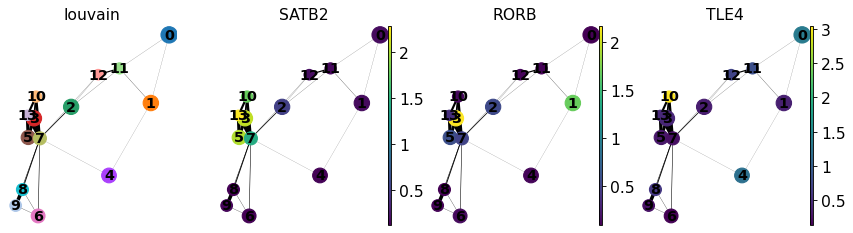

In [21]:
sc.pl.paga(adata, color=['louvain', 'SATB2','RORB', 'TLE4']) # Excitatory neurons

--> added 'pos', the PAGA positions (adata.uns['paga'])


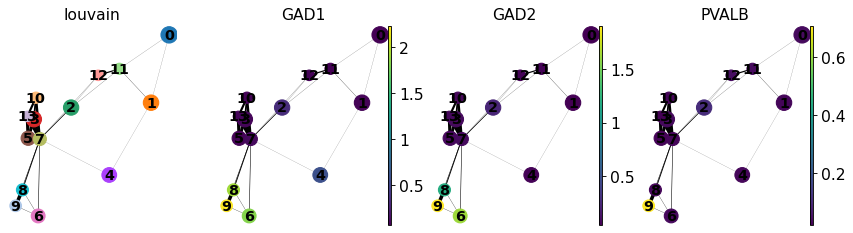

In [22]:
sc.pl.paga(adata, color=['louvain', 'GAD1', 'GAD2','PVALB']) # Internuerons

--> added 'pos', the PAGA positions (adata.uns['paga'])


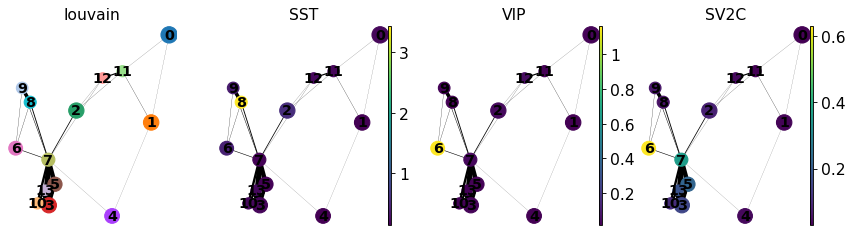

In [23]:
sc.pl.paga(adata, color=['louvain', 'SST', 'VIP', 'SV2C']) # Internuerons

--> added 'pos', the PAGA positions (adata.uns['paga'])


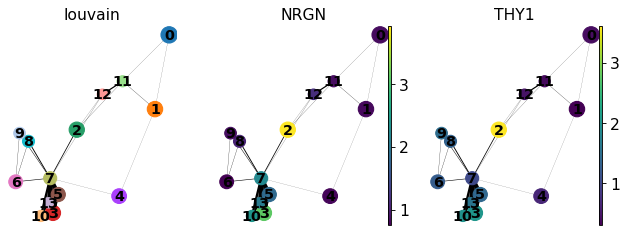

In [24]:
sc.pl.paga(adata, color=['louvain', 'NRGN', 'THY1']) # NRGN neurons

--> added 'pos', the PAGA positions (adata.uns['paga'])


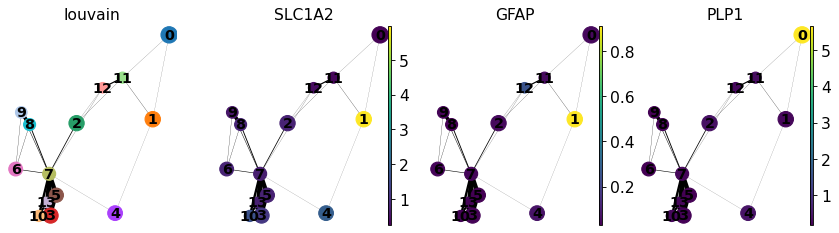

In [25]:
sc.pl.paga(adata, color=['louvain', 'SLC1A2', 'GFAP', 'PLP1']) # Glial and endothelial cells

--> added 'pos', the PAGA positions (adata.uns['paga'])


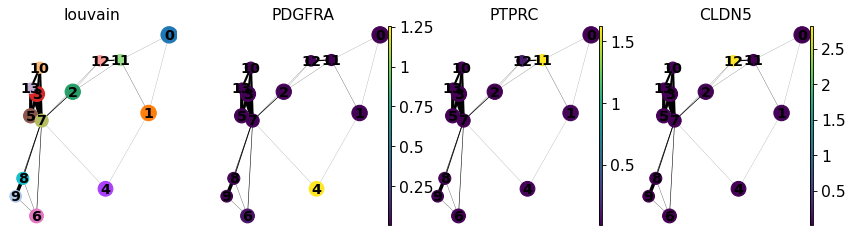

In [26]:
sc.pl.paga(adata, color=['louvain', 'PDGFRA', 'PTPRC', 'CLDN5']) # Glial and endothelial cells

In [27]:
adata.obs['louvain'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13'],
      dtype='object')

In [28]:
adata.obs['louvain_anno'] = adata.obs['louvain']

In [29]:
adata.obs['louvain_anno'].cat.categories = ['0/Oligo', '1', '2', '3/L', '4', '5', '6/Inter', '7', '8', '9', '10', '11/Micro', '12/Endo',
       '13']

In [30]:
sc.tl.paga(adata, groups='louvain_anno')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:23)


--> added 'pos', the PAGA positions (adata.uns['paga'])


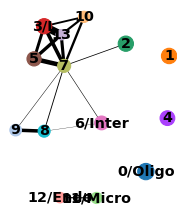

In [31]:
sc.pl.paga(adata, threshold=0.03, show=False)

# Recomputating the embedding using PAGA-initialization

In [32]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:18:24)


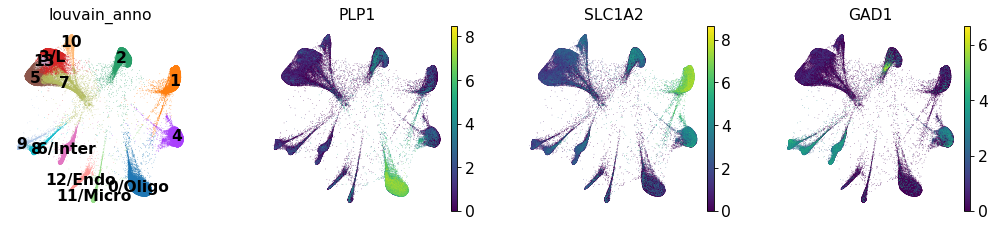

In [33]:
sc.pl.draw_graph(adata, color=['louvain_anno', 'PLP1', 'SLC1A2', 'GAD1'], legend_loc='on data')

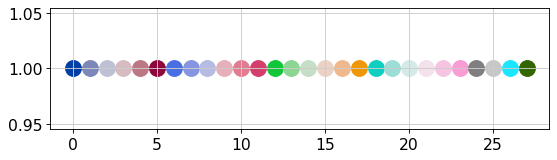

In [34]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [35]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(adata.uns['louvain_anno_colors'])

In [36]:
adata.uns['louvain_anno_colors'] = new_colors

--> added 'pos', the PAGA positions (adata.uns['paga'])


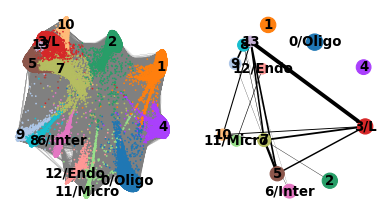

In [37]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

# Reconstructing gene changes along PAGA paths for a given set of genes

In [38]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain_anno']  == '11/Micro')[0]

In [39]:
sc.tl.dpt(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:02)
    eigenvalues of transition matrix
    [1.         0.9988537  0.99794686 0.99753505 0.99743825 0.9969502
     0.99630994 0.995288   0.99440265 0.9876455  0.98447084 0.9820158
     0.97915834 0.97835904 0.9772437 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:35)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [40]:
gene_names = ['SYT1', 'RBFOX3', 'CUX2', 'SATB2', 'RORB', 'TLE4', 'GAD1',
              'GAD2', 'PVALB', 'SST', 'VIP', 'SV2C', 'NRGN', 'THY1',
              'SLC1A2', 'GFAP', 'PLP1', 'PDGFRA', 'PTPRC', 'CLDN5']

In [41]:
adata_raw 
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

NameError: name 'adata_raw' is not defined

In [ ]:
sc.pl.draw_graph(adata, color=['louvain_anno', 'dpt_pseudotime'], legend_loc='on data')

In [ ]:
paths = [('erythrocytes', [16, 12, 7, 13, 18, 6, 5, 10]),
         ('neutrophils', [16, 0, 4, 2, 14, 19]),
         ('monocytes', [16, 0, 4, 11, 1, 9, 24])]

In [ ]:
adata.obs['distance'] = adata.obs['dpt_pseudotime']

In [ ]:
adata.obs['clusters'] = adata.obs['louvain_anno']  # just a cosmetic change

In [ ]:
adata.uns['clusters_colors'] = adata.uns['louvain_anno_colors']

In [ ]:
!mkdir write

In [ ]:
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.savefig('./figures/paga_path_autism.pdf')
pl.show()

# Microglia

In [ ]:
adata.obs.columns

In [ ]:
adata.obs.cluster

In [ ]:
only_microglia = (adata.obs['cluster'] == 'Microglia')
microglia_ann = adata[only_microglia]

In [ ]:
microglia_ann.var_names

In [ ]:
sc.pp.highly_variable_genes(microglia_ann, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sc.pl.highly_variable_genes(microglia_ann)

In [ ]:
microglia_ann.raw = microglia_ann

In [ ]:
microglia_ann = microglia_ann[:, microglia_ann.var.highly_variable]

In [ ]:
sc.tl.pca(microglia_ann, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(microglia_ann, n_neighbors=323, n_pcs=15)
sc.tl.draw_graph(microglia_ann)

In [ ]:
sc.pl.draw_graph(microglia_ann, color='diagnosis', legend_loc='right margin')

In [ ]:
sc.pl.draw_graph(microglia_ann, color='sex', legend_loc='right margin')

In [ ]:
microglia_ann.var.sort_values(by= 'means', ascending=False).head(10)

In [ ]:
sc.tl.louvain(microglia_ann, resolution=1.0)

In [ ]:
microglia_ann

In [ ]:
sc.tl.paga(microglia_ann, groups='louvain')

In [ ]:
sc.pl.paga(microglia_ann, color=['louvain','PTPRD', 'MGAT5', 'CHN1'])

In [ ]:
sc.pl.paga(microglia_ann, color=['CTSB', 'FTH1', 'RASSF8', 'PDE4B'])

In [ ]:
sc.pl.paga(microglia_ann, color=['MARCH3', 'MT-ND3', 'CALM1'])	

In [ ]:
cont_target = (microglia_ann.obs['diagnosis'] == 'Control')
asd_target = (microglia_ann.obs['diagnosis'] != 'Control')
cont = microglia_ann[cont_target]
asd = microglia_ann[asd_target]

In [ ]:
cont

In [ ]:
sc.tl.pca(cont, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(cont, n_neighbors=323, n_pcs=15)
sc.tl.draw_graph(cont)

In [ ]:
cont

In [ ]:
sc.pl.draw_graph(cont, color='region', legend_loc='right margin')

In [ ]:
sc.tl.louvain(cont, resolution=1.0)

In [ ]:
sc.tl.paga(cont, groups='louvain')

In [ ]:
sc.pl.paga(cont, color=['louvain', 'PTPRD', 'MGAT5'])

In [ ]:
sc.pl.paga(cont, color=['louvain', 'CHN1', 'CTSB'])

In [ ]:
sc.pl.paga(cont, color=['louvain', 'FTH1', 'RASSF8'])

In [ ]:
sc.pl.paga(cont, color=['louvain','MARCH3', 'MT-ND3'])	

In [ ]:
sc.pl.paga(cont, color=['louvain', 'CALM1', 'PDE4B'])

In [ ]:
sc.tl.pca(asd, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(asd, n_neighbors=323, n_pcs=15)
sc.tl.draw_graph(asd)

In [ ]:
sc.pl.draw_graph(asd, color='region', legend_loc='right margin')

In [ ]:
sc.tl.louvain(asd, resolution=1.0)

In [ ]:
sc.tl.paga(asd, groups='louvain')

In [ ]:
sc.pl.paga(asd, color=['PTPRD', 'MGAT5'])

In [ ]:
sc.pl.paga(asd, color=['CHN1', 'CTSB'])

In [ ]:
sc.pl.paga(asd, color=['louvain', 'FTH1', 'RASSF8'])

In [ ]:
sc.pl.paga(asd, color=['louvain','MARCH3', 'MT-ND3'])	

In [ ]:
sc.pl.paga(asd, color=['louvain', 'CALM1', 'PDE4B'])

# Upper Layer

In [ ]:
only_excit = adata.obs['cluster'].str.contains('L')
excit_ann = adata[only_excit]

In [ ]:
sc.pp.highly_variable_genes(excit_ann, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
excit_ann.raw = excit_ann

In [ ]:
excit_ann = excit_ann[:, excit_ann.var.highly_variable]

In [ ]:
sc.tl.pca(excit_ann, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(excit_ann, n_neighbors=323, n_pcs=15)
sc.tl.draw_graph(excit_ann)

In [ ]:
sc.pl.draw_graph(excit_ann, color='diagnosis', legend_loc='right margin')

In [ ]:
sc.pl.draw_graph(excit_ann, color='region', legend_loc='right margin')

In [ ]:
sc.pl.draw_graph(excit_ann, color='cluster', legend_loc='right margin')

In [ ]:
excit_ann.var.sort_values(by= 'means', ascending=False).head(10)

In [ ]:
sc.tl.louvain(excit_ann, resolution=1.0)

In [ ]:
sc.tl.paga(excit_ann, groups='louvain')

In [ ]:
# sc.pl.paga(excit_ann, color='louvain')

In [ ]:
sc.pl.paga(excit_ann, color=['louvain','CNTNAP5', 'TMSB10'])

In [ ]:
sc.pl.paga(excit_ann, color=['louvain','CTSB', 'ZNF804B', 'HS3ST4'])

In [ ]:
sc.pl.paga(excit_ann, color=['louvain','MT-CYB', 'MT-ND2', 'KIAA1217'])

In [ ]:
sc.pl.paga(excit_ann, color=['louvain','CTSB', 'FTH1', 'RASSF8', 'PDE4B'])

In [ ]:
cont_target = (excit_ann.obs['diagnosis'] == 'Control')
asd_target = (excit_ann.obs['diagnosis'] != 'Control')
cont = excit_ann[cont_target]
asd = excit_ann[asd_target]

In [ ]:
sc.tl.pca(cont, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(cont, n_neighbors=323, n_pcs=15)
sc.tl.draw_graph(cont)

In [ ]:
sc.pl.draw_graph(cont, color='region', legend_loc='right margin')

In [ ]:
sc.tl.louvain(cont, resolution=1.0)

In [ ]:
sc.tl.paga(cont, groups='louvain')

In [ ]:
sc.pl.paga(cont, color=['louvain','CNTNAP5', 'TMSB10'])

In [ ]:
sc.pl.paga(cont, color=['louvain','CTSB', 'ZNF804B', 'HS3ST4'])

In [ ]:
sc.pl.paga(cont, color=['louvain','MT-CYB', 'MT-ND2', 'KIAA1217'])

In [ ]:
sc.pl.paga(cont, color=['louvain','CTSB', 'FTH1', 'RASSF8', 'PDE4B'])

In [ ]:
sc.tl.pca(asd, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(asd, n_neighbors=323, n_pcs=15)
sc.tl.draw_graph(cont)

In [ ]:
sc.pl.draw_graph(asd, color='region', legend_loc='right margin')

In [ ]:
sc.tl.louvain(asd, resolution=1.0)

In [ ]:
sc.tl.paga(asd, groups='louvain')

In [ ]:
sc.pl.paga(asd, color=['louvain','CNTNAP5', 'TMSB10'])

In [ ]:
sc.pl.paga(asd, color=['MT-CYB', 'MT-ND2', 'KIAA1217'])

In [ ]:
sc.pl.paga(asd, color=['louvain','CTSB', 'ZNF804B', 'HS3ST4'])

In [ ]:
sc.pl.paga(cont, color=['louvain','MT-CYB', 'MT-ND2', 'KIAA1217'])

In [ ]:
sc.pl.paga(cont, color=['louvain','CTSB', 'FTH1', 'RASSF8', 'PDE4B'])